<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/HW_1007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. 텍스트 분석 이해

텍스트 분석 : 비정형 데이터인 텍스트를 분석하는 것

지금까지의 머신러닝 모델은 주어진 정형 데이터 기반에서 모델을 수립하고 예측을 수행했다. 머신러닝 알고리즘은 숫자형의 피처 기반 데이터만 입력받을 수 있기 때문에, 텍스트를 머신러닝에 적용하기 위해서는 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미있는 값을 부여하는지가 매우 중요하다.

피처 벡터화(피처 추출) : 텍스트를 word(word의 일부분) 기반 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하여 텍스트를 단어의 조합인 벡터값으로 변환하는 것. 이 책에서는 BOW(Bag of Words) 방법을 다룬다.

## 텍스트 분석 수행 프로세스

1. 텍스트 사전 준비작업(텍스트 전처리) : 텍스트를 피처로 만들기 전에 미리 클렌징하는 것. 대/소문자 변경이나 특수문자 삭제 등 클렌징 작업, 단어(Word) 등의 토큰화 작업, 의미 없는 단어(Stop word) 제거 작업, 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업을 통칭한다.

2. 피처 벡터화/추출 : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당. BOW와 Word2Vec 등의 방법이 있으며, BOW는 Count 기반과 TF-IDF 기반 2가지가 있다.

3. 머신러닝 모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 머신러닝 모델을 적용해 학습/예측 및 평가 수행

## 파이썬 기반의 NLP, 텍스트 분석 패키지

* NLTK : 가장 대표적인 NLP 패키지. 수행 속도가 느려서 대량의 데이터에서는 제대로 활용되지 못함

* Gensim : 토픽 모델링 분야에서 두각을 나타내는 패키지. Word2Vec 구현 등 다양한 신기능 제공. SpaCy와 함께 가장 많이 사용됨

* SpaCy : 뛰어난 수행 성능으로 최근 가장 많이 사용됨

사이킷런은 NLP 패키지에 특화된 라이브러리는 갖고 있지 않으므로, 기본적인 것은 가능하지만 더 다양한 텍스트 분석이 필요한 경우 위와 같은 NLP 전용 패키지와 결합해 사용된다.

# 02. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

텍스트 정규화 : 텍스트를 머신러닝 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등 다양한 사전 작업을 수행하는 것. 다음과 같이 분류할 수 있다.

* 클렌징(Cleansing)

* 토큰화(Tokenization)

* 필터링/스톱 워드 제거/철자 수정

* Stemming

* Lemmatization

## 클렌징

택스트애서 분석에 방해되는 불필요한 문자, 기호 등을 사전에 제거(ex. HTML, XML 태그, 특정 기호 등)

## 텍스트 토큰화

### 문장 토큰화

일반적으로 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리한다. 또한 정규 표현식에 따른 문장 토큰화도 가능하다. NLTK에서 일반적으로 쓰이는 sent_tokenize를 이용해서 3개의 문장으로 이루어진 텍스트 문서를 문장으로 각각 분리해 보자. 

In [ ]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt') #마침표, 개행 문자 등의 데이터 세트를 다운로드

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
              You can see it out your window or on your television. \
              You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample) #sent_tokenize : 각각의 문장으로 구성된 list 객체 반환

print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


반환된 list 객체는 3개의 문장으로 된 문자열을 갖고 있다.

### 단어 토큰화

문장을 단어로 토큰화하는 것으로, 공백, 콤마(,), 마침표(.), 개행문자(\n) 등으로 단어를 분리하고, 정규 표현식을 이용해 다양한 유형으로도 수행할 수 있다.

마침표나 개행문자와 같이 문장을 분리하는 구분자를 이용해 단어를 토큰화할 수 있으므로 BOW와 같이 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분하다. 일반적으로 문장 토큰화는 각 문장이 가지는 의미가 중요한 요소로 사용될 때 쓴다. NLTK의 word_tokenizer를 이용해 단어 토큰화를 수행해 보자.

In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words),len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


sent_tokenize와 word_tokenize를 조합해 문서에 대해서 모든 단어를 토큰화해보자. 이전 예제의 3개 문장으로 구성된 text_sample의 문장별로 단어 토큰화를 적용하는데, 이때 문서를 먼저 문장으로 나누고, 개별 문장을 다시 단어로 토큰화하는 함수를 생성한다.

In [ ]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하는 함수 생성
def tokenize_text(text):
  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


word_tokens : 3개의 리스트 객체를 내포하는 리스트. 내포된 개별 리스트 객체는 각각 문장별로 토큰화된 단어를 요소로 갖는다.

문장을 단어별로 하나씩 토큰화하면 문맥적인 의미는 무시되기 때문에, 이를 해결하기 위해 n-gram을 도입했다. n-gram은 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것이다. n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화를 수행한다. 예를 들어 'Agent Smith knocks the door'를 2-gram(bigram)으로 만들면 (Agent, Smith), (Smith, knocks), (knocks, the), (the, door)와 같이 연속적으로 2개의 단어들을 순차적으로 이동시키면서 토큰화한다.

## 스톱 워드 제거

스톱 워드(Stop word) : 분석에 큰 의미가 없는 단어(ex. is, the, a, will : 문장을 구성하는 필수 문법 요소이지만 문맥적으로 큰 의미가 없음)

이 단어들은 문법적인 특성으로 인해 텍스트에 빈번하게 나타나기 때문에 사전에 제거하지 않으면 오히려 중요한 단어로 인식될 수 있다.

NLTK에서 언어별로 목록화된 스톱 워드를 확인할 수 있다. 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# NLTK의 영어 stopword 개수를 알아보고 그중 20개 확인
print('영어 stop words 개수 : ',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수 :  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
# 위의 word_tokens 리스트에서 stopwords를 필터링으로 제거해 분석에 의미 있는 단어만 추출

import nltk

stopwords = nltk.corpus.stopwords.words('english')

all_tokens = []
# word_tokens 리스트에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


필터링을 통해 is, this와 같은 스톱 워드가 제거되었다.

## Stemming, Lemmatization

문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것을 의미한다.

Lemmatization이 Stemming보다 정교하고, 의미론적인 기반에서 단어의 원형을 찾는다. Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있다. 하지만 Lemmatization은 품사와 같은 문법적인 요소와 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아주고, 그래서 시간이 더 오래 걸린다. NLTK의 Stemming과 Lemmatization을 비교해 보자.

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer() #필요한 stemmer 객체 생성

# 위에서 만든 객체의 stem('단어') 메서드를 호출하여 원하는 단어 Stemming
print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


amuse의 경우 단순히 ing, s, ed가 붙는 것이 아니라 철자 변형이 일어나므로 원형을 제대로 인식하지 못한다. 형용사인 happy, fancy도 정확한 원형을 찾지 못했다.

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Lemmatization은 단어의 품사를 입력해서 보다 정확한 원형 추출
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


Stemmer보다 정확하게 원형을 추출한다.

# 03. Bag of Words - BOW

BOW : 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

다음 2개의 문장을 BOW의 단어 수(Word Count) 기반으로 피처를 추출해보자.

문장 1. 'My wife likes to watch baseball games and my daughter likes to watch baseball games too'

문장 2. 'My wife likes to play baseball'

1. 문장 1, 2에 있는 모든 단어에서 중복을 제거하고 각 단어(feature/term)를 칼럼 형태로 나열한다. 그리고 각 단어에 고유의 인덱스를 아래와 같이 부여한다.

'and' : 0, 'baseball' : 1, 'daughter' : 2, 'games' : 3, 'likes' : 4, 'my' : 5, 'play' : 6, 'to' : 7, 'too' : 8, 'watch' : 9, 'wife' : 10

2. 개별 문장에서 해당 단어가 나타나는 횟수(Occurence)를 각 단어(단어 인덱스)에 기재한다. 예를 들어 baseball은 문장 1, 2에서 총 3번 나타나며 daughter는 문장 1에서만 1번 나타난다.

BOW 모델은 빠르고 쉬운 구축이 가능하며, 단순히 단어의 발생 횟수에 기반하고 있지만 생각보다 문서의 특징을 잘 나타낼 수 있어서 여러 분야에서 활용된다. 하지만 BOW 기반 NLP 연구의 한계점도 있다.

* 문맥 의미(Semantic Context) 반영 부족 : 단어의 순서를 고려하지 않기 때문에 n_gram을 사용하더라도 단어의 문맥적인 의미가 무시된다.

* 희소 행렬 문제(희소성, 희소 행렬) : BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉽다. 희소 행렬은 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬을 의미한다. 예를 들어, 많은 문서에서 단어를 추출하면 매우 많은 단어가 칼럼으로 만들어지는데, 문서마다 서로 다른 단어로 구성되기에 단어가 문서마다 나타나지 않는 경우가 훨씬 더 많다. 매우 많은 문서에서 총 단어의 개수는 수만~수십만 개여도 하나의 문서에 있는 단어는 이중 극히 일부분이므로 대부분의 데이터가 0으로 채워지는 것이다. 희소 행렬의 반대말을 밀집 행렬이다. 희소 행렬은 일반적으로 머신러닝 알고리즘의 수행 시간과 예측 성능을 떨어뜨리기 때문에 이를 위한 특별한 기법이 마련돼 있다.

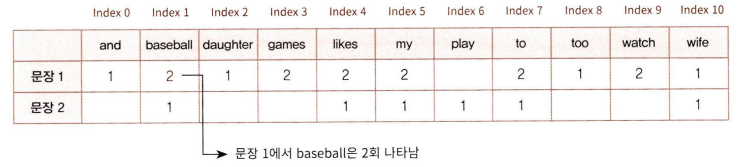

## BOW 피처 벡터화

각 문서(Document)의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값을 이 피처에 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법이다.

BOW 모델에서는 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것을 의미한다. 예를 들어 M개의 텍스트 문서가 있고, 이 문서에서 모든 단어를 추출해 나열했을 때 N개의 단어가 있다고 가정하면 M개의 문서는 각각 N개의 값이 할당된 피처의 벡터 세트가 되어 M X N개의 단어 피처로 이뤄진 행렬을 구성하게 된다.

* 카운트 기반의 벡터화 : 각 문서에서 해당 단어가 나타나는 횟수(count)를 단어 피처의 값으로 부여. 카운트 값이 높을수록 중요한 단어로 인식된다. TF-IDF를 사용해서 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어에 높은 값이 부여되는 것을 방지한다. 문서마다 텍스트가 길고 문서의 개수가 많은 경우 카운트 방식보다는 TF-IDF 방식을 사용하는 것이 더 좋은 예측 성능을 보장한다.

## 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer

CountVectorizer는 피처 벡터화뿐만 아니라 텍스트 전처리도 함께 수행한다. fit, transform을 통해 피처 벡터화된 객체를 반환한다.

입력 파라미터는 다음과 같다.

* max_df : 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외. 예를 들어 100으로 설정하면 전체 문서에 걸쳐 100개 이하로 나타나는 단어만 피처로 추출한다. 만약 소수점 값(0,0 ~ 1.0)을 가지면 전체 문서에 걸쳐 빈도수 0 ~ 95%까지의 단어만 피처로 추출한다.

* min_df : 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외. max_df와 작동 방식이 같다.

* max_features : 추출하는 피처의 개수를 정수 값으로 제한

* stop_words : 언어 이름을 지정하면 해당 언어의 스톱 워드로 지정된 단어를 추출에서 제외

* n_gram_range : BOW 모델의 단어 순서를 보강하기 위한 n_gram 범위 설정. 튜플 형태로 (범위 최솟값, 최댓값)을 지정한다. 예를 들어 (1,1)이면 토큰화된 단어를 1개씩 피처로 추출하고, (1,2)이면 토큰화된 단어를 1개씩, 그리고 순서대로 2개씩 묶어서 피처로 추출한다.

* analyzer : 피처 추출을 수행한 단위 지정. default = 'word'

* token_pattern : 토큰화를 수행하는 정규 표현식 패턴 지정. default = '\b\w\w+\b' - 공백 또는 개행 문자 등으로 구분된 단어 분리자(\b) 사이의 2문자(문자 또는 숫자) 이상의 단어를 토큰으로 분리. 거의 변경하지 않는다.

* tokenizer : 토큰화를 별도의 커스텀 함수로 이용 시 적용. 일반적으로 어근 변환 시 이를 수행하는 별도의 함수를 적용한다.

CountVectorizer 클래스를 이용한 피처 벡터화 방법

1. 사전 데이터 가공 : 영어의 경우 모든 문자를 소문자로 변경하는 등 전처리 수행

2. 토큰화 : 디폴트로 단어 기준으로 n_gram_range를 반영해 각 단어 토큰화

3. 텍스트 정규화 : 텍스트 정규화 수행(stop_words 파라미터가 주어진 경우 스톱 워드 필터링만 가능), Stemming과 Lemmatization 등 어근 변환은 직접 지원하지 않으므로 tokenizer 파라미터에 함수를 적용

4. 피처 벡터화 : max_df, min_df, max_features 등 파라미터를 이용해 토큰화된 단어를 피처로 추출하고 단어 빈도서 벡터 값 적용

TF-IDF 벡터화는 TfidfVectorizer 클래스를 이용하는데, 파라미터 변환 방법은 CountVectorizer와 동일하다.

## BOW 벡터화를 위한 희소 행렬

위의 두 클래스를 이용해 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형태의 희소 행렬을 반환한다. BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬이다. 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야 하는데, COO와 CSR 형식의 2가지 방법이 있다. 일반적으로 CSR의 수행 능력이 더 뛰어나다.

## 희소 행렬 - COO 형식

0이 아닌 데이터만 별도의 데이터 배열(Array)에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

[ [3,0,1], [0,2,0] ]과 같은 2차원 데이터에서 0이 아닌 데이터는 [3,1,2]이며 0이 아닌 데이터가 있는 위치는 (0,0), (0,2), (1,1)이다. row와 col을 별도의 배열로 저장하면 각각 [0,0,1], [0,2,1]이다.

Scipy의 sparse를 이용해 희소 행렬 변환을 COO 형식으로 수행해보자.

In [1]:
import numpy as np

dense = np.array([ [3,0,1], [0,2,0] ])

from scipy import sparse

# 0이 아닌 데이터 추출
data =  np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data,(row_pos,col_pos)))

희소 행렬 객체 변수 sparse_coo를 toarray 메서드를 이용해 다시 밀집 형태의 행렬로 출력

In [3]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

## 희소 행렬 - CSR 형식

COO 형식이 행과 열의 위치를 나타내기 위해 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

0이 아닌 데이터 값의 행 위치 배열이 [0,0,1,1,1,1,1,2,2,3,4,4,5]인 데이터가 있다고 하면, 순차적인 같은 값이 반복적으로 나타난다. 행 위치 배열이 0부터 순차적으로 증가하는 값으로 이뤄졌기 때문에 행 위치 배열의 고유한 값의 시작 위치만 표기하는 방법으로 반복을 제거할 수 있다. 행 위치 배열의 고유값 시작 위치는 인덱스 기준으로 [0,2,...]이런 식으로 되는 것이다. 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식을 CSR이라고 한다.

위 예제를 CSR로 변환하면 행 위치 배열은 [0,2,7,9,10,12]가 되고, 맨 마지막에는 데이터의 총 항목 개수를 배열에 추가해야 한다. 따라서 최종적으로 CSR 변환되는 배열은 [0,2,7,9,10,12,13]이다.

csr_matrix를 사용해서 CSR 방식의 변환을 해보자.

In [5]:
from scipy import sparse

dense2 = np.array([ [0,0,1,0,0,5], [1,4,0,3,2,5], [0,6,0,3,0,0], [2,0,0,0,0,0], [0,0,0,7,0,8], [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2,(row_pos,col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2,col_pos,row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


실제 사용 시에는 다음과 같이 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성한다.

In [6]:
dense3 = np.array([ [0,0,1,0,0,5], [1,4,0,3,2,5], [0,6,0,3,0,0], [2,0,0,0,0,0], [0,0,0,7,0,8], [1,0,0,0,0,0]])
coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

두 클래스로 변환된 피처 벡터화 행렬은 모두 Scipy CSR 형태의 희소 행렬이다.